My linux is having a little problem on mpl's Chinese font.All charts will NOT have their Dep. name shown; instead the ID will be shown.

**THIS IS NOT FINISHED**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import ipywidgets

In [2]:
df = pd.read_excel('http://gra103.aca.ntu.edu.tw/gra2007/gra/wei/%E9%8C%84%E5%8F%96%E6%83%85%E6%B3%81-101%E7%A2%A9(%E5%85%A8%E9%83%A8).xls')

In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.drop(['口試','口試比例','錄取情況','錄取最低分數','本校最低門檻'],axis=1)
df = df.dropna(subset=['錄取率'])
df = df.drop(range(0,5))
df['錄取率'] = pd.to_numeric(df['錄取率'], downcast='float')
df['報考人數'] = pd.to_numeric(df['報考人數'], downcast='integer')
df = df.fillna(value = '-')
df.rename(columns={'簡章代碼' : 'ID', '錄取率':'Qualification Rate'}, inplace=True)

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
df2 = df[df['報考人數'] > 30]

In [6]:
df2 = df2.sort_values(by = ['Qualification Rate'], ascending = False)

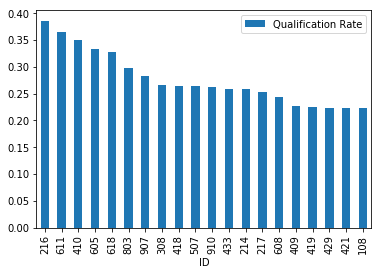

In [7]:
df2[:20].plot.bar(x='ID', y=['Qualification Rate'])

In [8]:
def search(str):
    print(df2[df2['ID'] == str])

In [9]:
ipywidgets.interact(search, str = '')

interactive(children=(Text(value='', description='str'), Output()), _dom_classes=('widget-interact',))

<function __main__.search(str)>